# 고잉 deeper NLP 6장

## WEAT(Word Embedding Association Test)

워드 임베딩에 내포된 편향성을 정량적으로 측정할 방법 

코사인 유사도를 통해서 계산함. 두 벡터의 코사인값을 이용하여 각도를 계산함

[개념이 발표된 논문 원본](https://arxiv.org/pdf/1608.07187.pdf)

단 하나의 단어끼리만 거리를 계산하면 증명이 충분하지 않을 수 있음.

그렇기 때문에 편향을 계산할 개념을 가장 잘 대표하는 단어들을 선택해 set을 만듬.

그후 셋들에 속한 단어들끼리 편향성을 계산하여 편향성을 계산하여 평균을 구하고 , normalize하면 더 통계적으로 유의하다는 증명을 가능함.

이 set들을 target과 attribute로 하고

target X, Y attribute A, B로 구분함.

이때 X-Y 개념축, A-B 개념축을 만들고

편향이 없다면 

X의 단어들이 A, B에 속한 단어들과의 거리의 차이가 없을 것임.

Y의 단어들도 A, B에 속한 단어들과 거리의 차이가 없을 것임. 

식을 통해 더 구체화해보자면 

In [12]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [15]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B#, c_a, c_b


dot prodcut과 magnitude 계산 함수와 

s(w,A,B)함수임. s(w,A,B)는 target의 단어 w가 개념축 A-B에 가지는 편향석을 계산한 값임.

값이 클수록 B보다 A에 더 가깝게 됨. 

(ex: 코사인 유사도는 -1~1의 값을 가지고 같은 방향일수록 1에 가깝고 0일때 직교하며 반대 방향일수록 -1에 가까움)

In [46]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev



s_X(X,A,B)는 단어 x가 두 attribute 셋 A,B에 속한 단어들과의 유사도의 평균값이 얼마나 차이나는지를 측정하게됨.

즉 s_X(X,A,B)는 개별 단어가 개념축 A-B에 대해서 가지는 편향성을 계산한것이 되고, 클수록 편향성을 가지는것임

s_X(X,A,B)와 S_Y(Y,A,B)의 범위는 (-2,2)가 됨

이후 이것들을 다시 각 X로 평균내고 S_X,S_Y를 뺀후에 std로 normalize한것이 weat_score가 됨.


weat_score가 크면 편향성이 크다는것을 나타냄

## 구글 뉴스가 학습된 워드 임베딩에 적용

GoogleNews-vectors-negative300.bin.gz

이 데이터를 사용했음.

In [1]:
import os

data_dir = '~/aiffel/weat' 
model_dir = os.path.join(data_dir, 'GoogleNews-vectors-negative300.bin')

from gensim.models import KeyedVectors

# 50만개의 단어만 활용합니다. 메모리가 충분하다면 limit 파라미터값을 생략하여 300만개를 모두 활용할 수 있습니다. 
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True, limit=500000)

단어수가 너무 많기에 limit로 최대 단어수를 50만개로 제한

In [2]:
w2v

In [5]:
print(len(w2v.vocab))   # Gensim 3.X 버전까지는 w2v.vocab을 직접 접근할 수 있습니다. 
# print(len(w2v.index_to_key))   # Gensim 4.0부터는 index_to_key를 활용해 vocab size를 알 수 있습니다. 
print(len(w2v['I']))                    # 혹은 단어를 key로 직접 vector를 얻을 수 있습니다. 
print(w2v.vectors.shape)

500000
300
(500000, 300)


w2v에는 limit로 지정한 갯수의 단어가 있고 각 단어는 300차원으로 구성되어있음.

실제로 happy의 단어 벡터

In [6]:
w2v['happy']

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [7]:
w2v.most_similar(positive=['happy'])

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

happy는 glad, pleased와 유사한데 확실히 유사한 단어들인것을 느낄수있음.

In [8]:
w2v.most_similar(positive=['family'])

[('relatives', 0.6662652492523193),
 ('familiy', 0.6517066955566406),
 ('families', 0.6252894401550293),
 ('siblings', 0.6140849590301514),
 ('friends', 0.6128394603729248),
 ('mother', 0.6065611839294434),
 ('aunt', 0.5811319947242737),
 ('grandparents', 0.576207160949707),
 ('father', 0.5717043876647949),
 ('Family', 0.5672314763069153)]

family의 오타인 familiy도 보임. 오타도 비슷한 상황에서 나타나기 때문에 유사한 단어로 계산된게 볼수있음.

In [9]:
w2v.most_similar(positive=['school'])

[('elementary', 0.7868632674217224),
 ('schools', 0.7411909103393555),
 ('elementary_schools', 0.6597153544425964),
 ('kindergarten', 0.6529810428619385),
 ('eighth_grade', 0.6488089561462402),
 ('School', 0.6477997303009033),
 ('teacher', 0.63824063539505),
 ('students', 0.6301523447036743),
 ('classroom', 0.6281620860099792),
 ('Schools', 0.6172096133232117)]

이렇게 WEAT를 통해 이 모델의 편향성을 확인할 수 있음.

아래는 [논문](https://arxiv.org/pdf/1608.07187.pdf)에 있는 단어 SET으로 구성되어있음

In [18]:
target_A = ['science', 'technology', 'physics', 'chemistry', 'Einstein', 'NASA', 'experiment', 'astronomy']
target_B = ['poetry', 'art', 'Shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']
attribute_X = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_Y = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

A = np.array([w2v[word] for word in target_A])
B = np.array([w2v[word] for word in target_B])
X = np.array([w2v[word] for word in attribute_X])
Y = np.array([w2v[word] for word in attribute_Y])

weat_score(X, Y, A, B)

1.4821917

과학 관련 단어는 남자, 예술에 관한 단어는 여자에 가깝게 만들어져 weat_score가 높게 나타났음

In [19]:
target_A = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_B = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_X = ['junk', 'canned', 'convenience', 'frozen', 'fast']
attribute_Y = ['health', 'beneficial', 'good', 'nourishing', 'nutritious']

A = np.array([w2v[word] for word in target_A])
B = np.array([w2v[word] for word in target_B])
X = np.array([w2v[word] for word in attribute_X])
Y = np.array([w2v[word] for word in attribute_Y])

weat_score(X, Y, A, B)

1.6929383

조금 다르게 해석하는것으로 인스턴트 식품명과 인스턴트를 의미하는 단어,      
채식,건강식품명과 단어와 건강식을 의미하는 형용사들을 묶어 set을 나타내도 

weat_score가 높게 나타났음. 

이 경우에는 **편향성보다는 단어의 의미를 잘 파악했다** 는 수치적 척도의 뜻으로도 해석할수있음

In [20]:
target_A = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_B = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_X = ['book', 'essay', 'dictionary', 'magazine', 'novel']
attribute_Y = ['news', 'report', 'statement', 'broadcast', 'word']

A = np.array([w2v[word] for word in target_A])
B = np.array([w2v[word] for word in target_B])
X = np.array([w2v[word] for word in attribute_X])
Y = np.array([w2v[word] for word in attribute_Y])

weat_score(X, Y, A, B)

-0.082050726

target이랑 관련이 없는 attribute 를 설정해보면 0에 가까워서 편향성이 존재한다고 보기 힘들게 나타났음

In [21]:
del w2v
print('삭제완료')

삭제완료


메모리를 많이 차지하기 때문에 삭제함

## 직접 만든 Word Embedding에 WEAT 적용

이제 주어진 데이터로 다음과 같은 과정을 수행하여 적용해봄

1. 형태소 분석기를 이용하여 품사가 명사인 경우, 해당 단어를 추출하기

2. 추출된 결과로 embedding model 만들기

3. TF/IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기

4. embedding model과 단어 셋으로 WEAT score 구해보기

####  1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

synopsis.txt(대략 17MB)에는 2001년부터 2019년 8월까지 제작된 영화들의 시놉시스 정보가 있음

( 더 많은 영화 정보를 원하시면 KOBIS에 존재함)


``` terminal
$ wget https://aiffelstaticprd.blob.core.windows.net/media/documents/synopsis.zip
$ mv synopsis.zip ~/aiffel/weat
$ cd ~/aiffel/weat && unzip synopsis.zip
```

In [22]:
import os

with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

--------
이제 synopsis.txt 파일을 읽어 konlpy 패키지를 이용하여 품사가 명사인 경우만 남기고

tokenized라는 변수명으로 저장해봄


``` terminal
$ pip install konlpy
```

In [23]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [24]:
print(len(tokenized))

71156


71156개의 명사가 추출되었음

### 2. 추출된 결과로 embedding model 만들기


In [26]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
# model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
# model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
model.most_similar(positive=['영화'])

/home/ssac4/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('작품', 0.9070759415626526),
 ('다큐멘터리', 0.8515136241912842),
 ('드라마', 0.8352524042129517),
 ('영화로', 0.8190748691558838),
 ('형식', 0.8113033175468445),
 ('주제', 0.8026663064956665),
 ('소재', 0.7932949066162109),
 ('송일곤', 0.7918614149093628),
 ('스토리', 0.7907422780990601),
 ('코미디', 0.7901086211204529)]

영화 시놉시스 텍스트를 통해 학습하다보니 영화라는 단어는 작품이랑 매우 가깝게 생성되었음.

즉 어떤 text를 가지고 학습시키는지에 따라 임베딩도 매우 달라진다는것에 유의해야함

In [27]:
model.wv.most_similar(positive=['사랑'])

[('애정', 0.7341066598892212),
 ('연애', 0.7116760611534119),
 ('행복', 0.70481276512146),
 ('첫사랑', 0.7040883302688599),
 ('시빌라', 0.7036919593811035),
 ('아르튬', 0.7003369331359863),
 ('진심', 0.7002869844436646),
 ('만남', 0.6879246234893799),
 ('우정', 0.6843553781509399),
 ('열정', 0.6804129481315613)]

In [28]:
model.wv.most_similar(positive=['연극'])

[('영화감독', 0.9031145572662354),
 ('배우', 0.8892683982849121),
 ('영감', 0.8834878206253052),
 ('대본', 0.8815126419067383),
 ('시나리오', 0.8780593872070312),
 ('연기자', 0.8775286674499512),
 ('각색', 0.8770350217819214),
 ('캐스팅', 0.8764846324920654),
 ('공연', 0.8761006593704224),
 ('원표', 0.8753910064697266)]

### 3. TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기
-----------------------

WEAT score를 구할 때 단어 셋을 만들어줘야함.

targets_X, targets_Y, attribute_A, attribute_B들임

즉 직접 만든 데이터로 weat를 계산하려면 이 set들을 어떤 기준으로

어떤 항목을 사용해야 정해야함.

이번 프로젝트에서는 영화장르와, 상업/예술영화 구분을 이용하겠음



* 영화 구분            
    - synopsis_art.txt : 예술영화         
    - synopsis_gen.txt : 상업영화(일반영화)                
    - 그 외 독립영화 등으로 분류됩니다.                   

* 장르 구분       
    - synopsis_SF.txt: SF                
    - synopsis_가족.txt: 가족
    - synopsis_공연.txt: 공연
    - synopsis_공포(호러).txt: 공포(호러)
    - synopsis_기타.txt: 기타
    - synopsis_다큐멘터리.txt: 다큐멘터리
    - synopsis_드라마.txt: 드라마
    - synopsis_멜로로맨스.txt: 멜로로맨스
    - synopsis_뮤지컬.txt: 뮤지컬
    - synopsis_미스터리.txt: 미스터리
    - synopsis_범죄.txt: 범죄
    - synopsis_사극.txt: 사극
    - synopsis_서부극(웨스턴).txt: 서부극(웨스턴)
    - synopsis_성인물(에로).txt: 성인물(에로)
    - synopsis_스릴러.txt: 스릴러
    - synopsis_애니메이션.txt: 애니메이션
    - synopsis_액션.txt: 액션
    - synopsis_어드벤처.txt: 어드벤처
    - synopsis_전쟁.txt: 전쟁
    - synopsis_코미디.txt: 코미디
    - synopsis_판타지.txt: 판타지
    
  
  
즉 상업/예술 영화를 target으로, 드라마와 액션을 attribute로 삼겠음.


이렇게 축을 삼고 **드라마는 예술 영화적 성격이 강하다.**

**액션 장르는 상업영화적 성격이 강하다는 가설**을 세워보고

이것을 **weat score의 계산을 통해 검증**해보겠음



'synopsis_art.txt', 'synopsis_gen.txt' 두 파일을 읽고, 위에서 했던 것과 마찬가지로 명사에 대해서만 추출하여 art, gen 변수에 할당함.

In [ ]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

명사만 추출하는 것을 read_token으로 함수화함

In [29]:
def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [30]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.



#### attribute 설정 방법

연구자 임의적인 설정이 아닌 좀 더 객관적으로 attribute 단어 셋을 설정하기 위해 
예술영화 시놉시스에는 잘 나타나지만 다른 영화에는 나타나지않는 단어를 설정할것임

비슷한 개념인 TF_IDF를 통해서 attribute를 선정해봄 



In [31]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [32]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [33]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

TF-IDF가 높은 순서로 추출했는데 양쪽에 중복된 단어가 너무 많음.
중복된 단어를 제외하고 상위 n개를 추출함


In [34]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

추출한 단어를 확인함


In [35]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [36]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


이제 장르의 attribute를 추출할때 드라마와 액션 둘만 보기보다는
여러 장르를 동시에 고려해서 선택하기위해 주요 장르 5개를 선택했음


In [37]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

In [38]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [39]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(6, 33151)


In [40]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 친구, 이야기, 여자, 아버지, 엄마, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남자, 남편, 여자, 사람, 친구, 위해, 마음, 섹스, 결혼, 서로, 아내, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 친구, 모든, 목숨, 사실, 세계, 가족, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
전쟁: 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 윈터스, 자신, 사람, 공격, 임무, 연합군, 병사, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 남자, 가족, 영화, 하나, 


중복이 있지만 아무래도 다른 장르다 보니 중복되는게 적기 때문에 
그대로 사용하도록하곘음

## 4. embedding model과 단어 셋으로 WEAT score 구해보기

이제 WEAT_score를 계산함. 
traget_A는 art, target_B는 gen, attribute_X는 '드라마', attribute_Y는 '액션' 과 같이 설정함

target_A 는 art, target_B 는 gen으로 고정하고 attribute_X, attribute_Y를 바꿔가면서 구하면됨

구한 결과를 21x21 매트릭스 형태로 표현해서 matrix 라는 변수에 담음

In [42]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [49]:
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [55]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
       # if matrix[i][j] > 1.1 or matrix[i][j] < -1.1:
            print(genre_name[i], genre_name[j],matrix[i][j])

드라마 멜로로맨스 -0.6994938
드라마 액션 -0.028636964
드라마 코미디 -0.014543903
드라마 전쟁 0.36217204
드라마 공포(호러) -0.15307935
멜로로맨스 액션 1.062331
멜로로맨스 코미디 0.7754352
멜로로맨스 전쟁 1.433532
멜로로맨스 공포(호러) 0.87090605
액션 코미디 0.013179308
액션 전쟁 0.5788888
액션 공포(호러) -0.18564959
코미디 전쟁 0.4240402
코미디 공포(호러) -0.15290956
전쟁 공포(호러) -0.7241164



* 예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있습니다.

<AxesSubplot:>

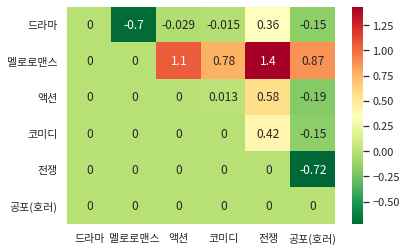

In [45]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="Noto Sans CJK JP")

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

위와 같이도 시각화 가능함

# 6-8. 프로젝트 : 모든 장르 간 편향성 측정해 보기

지금까지 우리는 영화 시놉시스 코퍼스를 가지고 영화 구분과 영화 장르 간에 내재된 편향성을 측정하는 작업을 진행해 보았습니다. 어느 정도는 우리의 상식과 일치하는 편향성이 측정되었을 것입니다.

이번에는 모든 장르에 대해 영화 구분과의 편향성 정도를 측정해 보겠습니다. 대부분의 과정은 이전 스텝에서 이미 진행한 내용을 참고해서 동일하게 진행 가능할 것입니다.

### STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [58]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [60]:
print(len(tokenized))

71156


### STEP 2. 추출된 결과로 embedding model 만들기

In [61]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
# model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
# model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  


In [62]:
model.wv.most_similar(positive=['전쟁'])

[('생존', 0.7759121656417847),
 ('전투', 0.7721431851387024),
 ('처절', 0.7636818885803223),
 ('평화', 0.762864351272583),
 ('소용돌이', 0.7573951482772827),
 ('학살', 0.7568584680557251),
 ('내전', 0.7497737407684326),
 ('선포', 0.7381144762039185),
 ('격변', 0.7376413345336914),
 ('조국', 0.7370121479034424)]

워드 임베딩이 잘 만들어 졌음을 확인할 수 있음

### STEP 3. target, attribute 단어 셋 만들기

#### target 만들기

In [63]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [64]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [66]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [67]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [68]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [69]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [70]:
print(target_art)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']


In [71]:
print(target_gen)

['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


#### attribute 만들기 

위랑 다르게 전체 장르를 다 이용함

In [72]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [73]:
# 꽤 오랜 시간이 걸림
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [74]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [77]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print('\n')
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 100):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()



SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 외계, 존재, 세상, 발견, 행성, 정체, 친구, 비밀, 사실, 기억, 전쟁, 사건, 시간, 공격, 영화, 한편, 실험, 능력, 시스템, 위협, 생명체, 정부, 아들, 사고, 스타크, 리플리, 과학자, 음모, 파괴, 아버지, 켈빈, 컨트, 모두, 수퍼맨, 임무, 발생, 가족, 요원, 죽음, 다시, 위기, 과거, 외계인, 도시, 이제, 갑자기, 상황, 운명, 분파, 불명, 연구, 개발, 때문, 탈출, 명의, 의문, 남자, 아이, 현실, 바이러스, 상어, 물체, 진화, 목숨, 최후, 통해, 프로젝트, 수트, 생존, 과연, 사랑, 히노키, 섹터, 미국, 여행, 대원, 멸망, 조직, 바로, 위험, 사이, 세력, 감염, 괴물, 거대, 


가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 할머니, 씨제이, 동구, 사랑, 아이, 사람, 학교, 세상, 소년, 슈이트, 이야기, 가장, 어머니, 마갈, 소녀, 미아, 대한, 펠리칸, 모두, 혼자, 서울, 벤트, 케이시, 마음, 사건, 할아버지, 엠마, 고양이, 크리스마스, 아내, 사이, 최호, 요정, 모험, 혜지, 유나, 테리, 위기, 다시, 번개, 손녀, 그레고리, 과연, 결심, 시골, 파코, 작품, 영화, 스튜어트, 해나, 인형, 단편, 기억, 발견, 서로, 하나, 한편, 부산, 아스, 장난감, 도시, 크누드, 누키, 제노, 아기, 때문, 이자, 펠릭스, 노동자, 회사, 생각, 사실, 마르, 주니, 강아지, 간다, 다른, 소식, 시간, 신차, 잉그릿, 제페토, 규완, 우산, 도움, 


공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 카르피, 비바, 왕자, 콘서트, 백작부인, 반니, 아리아, 미노, 차이코프스키, 라다, 무대, 도시, 공작, 리코, 시작, 파우스

코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 이야기, 인생, 아이, 아버지, 마음, 모든, 생각, 결혼, 엄마, 서로, 생활, 다른, 코미디, 사실, 대한, 감독, 국제, 아들, 때문, 다시, 모두, 세상, 바로, 시간, 아내, 최고, 사고, 학교, 섹스, 여행, 사이, 이제, 하나, 명의, 위기, 회사, 여자친구, 상황, 한편, 작품, 파티, 남편, 마지막, 연애, 모습, 계획, 아빠, 배우, 주인공, 점점, 이자, 관계, 가장, 매력, 단편, 형사, 하루, 밴드, 제안, 결심, 우리, 경찰, 발견, 문제, 순간, 소년, 동안, 가지, 준비, 세계, 간다, 삼순, 결혼식, 비밀, 클럽, 만난, 현실, 대학, 게다가, 서울, 통해, 계속, 로부터, 여성, 스타, 


판타지: 자신, 그녀, 시작, 위해, 사람, 사랑, 요괴, 영화제, 이야기, 영화, 소녀, 남자, 인간, 세상, 마을, 세계, 국제, 마법, 알렉스, 존재, 사건, 순영, 판타스틱, 친구, 아이, 모습, 여자, 모든, 부천, 서로, 시간, 기억, 유령, 현실, 비밀, 다른, 과거, 발견, 왕자, 사실, 순간, 하나, 공주, 공격, 죽음, 남보라, 다시, 엄마, 과연, 한편, 뱀파이어, 아버지, 운명, 통해, 차사, 괴물, 니모, 전설, 주인공, 왕국, 원풍, 작품, 왕비, 편지, 꼬마, 악마, 정체, 우주, 마음, 소년, 공간, 마지막, 덤블도어, 저승, 생각, 도움, 마법사, 탈출, 전쟁, 에드워드, 노인, 해리, 수현, 신들, 대인, 점점, 가장, 대한, 이자, 바버라, 얌마, 나서스, 단편, 에바, 목숨, 모두, 능력, 거인, 벨라, 미래, 


정말 무시무시한 단어들을 살펴볼 수 있었음. 

아무래도 tf-idf 방식이다 보니 고유명사가 너무 많이 나타난다는 단점이 존재하는듯함... 

하지만 일단 중복을 제거하는 방식으로 진행하도록 하겠음

#### 중복 set 제거

In [120]:
att0 = set(attributes[0])
att1 = set(attributes[1])
att2 = set(attributes[2])
att3 = set(attributes[3])
att4 = set(attributes[4])
att5 = set(attributes[5])
att6 = set(attributes[6])
att7 = set(attributes[7])
att8 = set(attributes[8])
att9 = set(attributes[9])
att10 = set(attributes[10])
att11= set(attributes[11])
att12 = set(attributes[12])
att13 = set(attributes[13])
att14 = set(attributes[14])
att15 = set(attributes[15])
att16 = set(attributes[16])
att17 = set(attributes[17])
att18 = set(attributes[18])
att19 = set(attributes[19])
att20 = set(attributes[20])


In [137]:
def dup_except_n(attributes,n):
    dup = []
    for i in range(len(attributes)):
        if i == n:
            continue
        for j in range(len(attributes[i])):
           # print(attributes[i][j])
            dup.append(attributes[i][j])
            
    return set(dup)

In [147]:
dup_except_0 = dup_except_n(attributes,0)
dup_except_1 = dup_except_n(attributes,1)
dup_except_2= dup_except_n(attributes,2)
dup_except_3= dup_except_n(attributes,3)
dup_except_4= dup_except_n(attributes,4)
dup_except_5= dup_except_n(attributes,5)
dup_except_6= dup_except_n(attributes,6)
dup_except_7= dup_except_n(attributes,7)
dup_except_8= dup_except_n(attributes,8)
dup_except_9= dup_except_n(attributes,9)
dup_except_10 = dup_except_n(attributes,10)
dup_except_11 = dup_except_n(attributes,11)
dup_except_12 = dup_except_n(attributes,12)
dup_except_13 = dup_except_n(attributes,13)
dup_except_14 = dup_except_n(attributes,14)
dup_except_15 = dup_except_n(attributes,15)
dup_except_16 = dup_except_n(attributes,16)
dup_except_17 = dup_except_n(attributes,17)
dup_except_18 = dup_except_n(attributes,18)
dup_except_19 = dup_except_n(attributes,19)
dup_except_20 = dup_except_n(attributes,20)
dup_all = dup_except_n(attributes,21)  # continue가 실행되는 부분이 없기에 전체 임 

In [152]:
atriubte_part_0 = list(att0 - dup_except_0)[0:5]
atriubte_part_1 = list(att1 - dup_except_1)[0:5]                                            
atriubte_part_2 = list(att2 - dup_except_2)[0:5]
atriubte_part_3 = list(att3 - dup_except_3)[0:5]
atriubte_part_4 = list(att4 - dup_except_4)[0:5]
atriubte_part_5 = list(att5 - dup_except_5)[0:5]
atriubte_part_6 = list(att6 - dup_except_6)[0:5]
atriubte_part_7 = list(att7 - dup_except_7)[0:5]
atriubte_part_8 = list(att8 - dup_except_8)[0:5]
atriubte_part_9 = list(att9 - dup_except_9)[0:5]
atriubte_part_10 = list(att10 - dup_except_10)[0:5]
atriubte_part_11 = list(att11 - dup_except_11)[0:5]
atriubte_part_12 = list(att12 - dup_except_12)[0:5]
atriubte_part_13 = list(att13 - dup_except_13)[0:5]
atriubte_part_14 = list(att14 - dup_except_14)[0:5]
atriubte_part_15 = list(att15 - dup_except_15)[0:5]
atriubte_part_16 = list(att16 - dup_except_16)[0:5]
atriubte_part_17 = list(att17 - dup_except_17)[0:5]
atriubte_part_18 = list(att18 - dup_except_18)[0:5]
atriubte_part_19 = list(att19 - dup_except_19)[0:5]
atriubte_part_20 = list(att20 - dup_except_20)[0:5]

In [ ]:
atriubte_part_0 = list(att0 - dup_except_0)[0:5]
atriubte_part_1 = list(att1 - dup_except_1)[0:5]                                            
atriubte_part_2 = list(att2 - dup_except_2)[0:5]
atriubte_part_3 = list(att3 - dup_except_3)[0:5]
atriubte_part_4 = list(att4 - dup_except_4)[0:5]
atriubte_part_5 = list(att5 - dup_except_5)[0:5]
atriubte_part_6 = list(att6 - dup_except_6)[0:5]
atriubte_part_7 = list(att7 - dup_except_7)[0:5]
atriubte_part_8 = list(att8 - dup_except_8)[0:5]
atriubte_part_9 = list(att9 - dup_except_9)[0:5]
atriubte_part_10 = list(att10 - dup_except_10)[0:5]
atriubte_part_11 = list(att11 - dup_except_11)[0:5]
atriubte_part_12 = list(att12 - dup_except_12)[0:5]
atriubte_part_13 = list(att13 - dup_except_13)[0:5]
atriubte_part_14 = list(att14 - dup_except_14)[0:5]
atriubte_part_15 = list(att15 - dup_except_15)[0:5]
atriubte_part_16 = list(att16 - dup_except_16)[0:5]
atriubte_part_17 = list(att17 - dup_except_17)[0:5]
atriubte_part_18 = list(att18 - dup_except_18)[0:5]
atriubte_part_19 = list(att19 - dup_except_19)[0:5]
atriubte_part_20 = list(att20 - dup_except_20)[0:5]

다소 복잡하지만 일단 이런식으로 작업을 해냄 

In [154]:
atriubte_part_0

['상어', '세력', '행성', '멸망', '과학자']

In [155]:
atriubte_part_1

['펠릭스', '장난감', '슈이트', '테리', '최호']

In [159]:
attributes = [atriubte_part_0,atriubte_part_1,atriubte_part_2,atriubte_part_3,
            atriubte_part_4,atriubte_part_5,atriubte_part_6,atriubte_part_7,atriubte_part_8,atriubte_part_9,
            atriubte_part_10,atriubte_part_11,atriubte_part_12,atriubte_part_13,atriubte_part_14,atriubte_part_15,
           atriubte_part_16,atriubte_part_17,atriubte_part_18,atriubte_part_19,atriubte_part_20]

In [160]:
attributes

[['상어', '세력', '행성', '멸망', '과학자'],
 ['펠릭스', '장난감', '슈이트', '테리', '최호'],
 ['볼쇼', '리골레토', '루나', '데모', '로돌포'],
 ['귀신', '좀비', '현상', '일행', '살인마'],
 ['상영작', '청소년', '실험영화', '단편영화', '거리'],
 ['주민', '지난', '다큐멘터리', '문화', '질문'],
 ['시절'],
 ['시아버지', '동거', '만남', '형수', '이혼'],
 ['에스메랄다', '베니', '지엔', '포르노', '이지아'],
 ['미스터리', '몰카', '누구', '홈즈', '의사'],
 ['거래', '마샨', '한길수', '강도', '프랭크'],
 ['아킬레스', '바토리', '방자', '윤우', '소율'],
 ['멕시코', '현상금', '형제', '총잡이', '추적자'],
 ['애무', '유코', '에피소드', '요코', '시오리'],
 ['아파트', '목격', '흔적', '행동'],
 ['도롱', '퍼니퍼', '코리아', '그림', '인디애니페스트'],
 ['갱단', '액션', '정보', '암살', '무술'],
 ['프리몬트', '옥자', '하니프', '루거', '아프리카'],
 ['사수', '동막골', '올로', '구출', '미군'],
 ['삼순', '게다가', '결혼식', '코미디', '밴드'],
 ['알렉스', '해리', '신들', '남보라', '거인']]

이렇게 중복단어를 빼고 만들었는데 문제가 생김.

1. 문제는 드라마는 나머지 장르와 시절 빼고 다 겹쳐서 하나 밖에 없음.

2. set으로 중복을 제거하다보니 중복을 제거한 후 list화시켜서 인덱스해서 선택한 단어는 
   더 많이 나오는 단어가 아니라 무작위적으로 선택된 단어임.

일단 이 두문제를 해결하려 고민했지만 일단 너무 중복단어가 많고 장르가 다양하기에 일단 중복을 걷어내는 것에 의의를 두고 작업했음



In [169]:
atriubte_part_6

['시절']

In [168]:
atriubte_part_6

['시절']

In [166]:
len(dup_except_6)

874

In [167]:
len(dup_all)

875

이렇게 전체 set이랑 드라마 장르를 제외한 set이랑 한개 밖에 찿이가 안남.. 

### STEP 4. WEAT score 계산과 시각화


In [170]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [171]:
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [172]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.0 or matrix[i][j] < -1.0:
            print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -1.4970272
SF 공포(호러) -1.1993521
SF 드라마 -2.505726
SF 멜로로맨스 -1.8534814
SF 미스터리 -1.4062684
SF 범죄 -1.2522318
SF 성인물(에로) -1.4182082
SF 스릴러 -1.641259
SF 판타지 -1.0402915
가족 기타 1.5291712
가족 다큐멘터리 1.4503804
가족 드라마 -1.896484
가족 멜로로맨스 -1.0763878
가족 뮤지컬 1.3295207
가족 사극 1.3341994
가족 액션 1.5271286
가족 어드벤처 1.256907
가족 전쟁 1.0595012
공연 기타 1.1468941
공연 드라마 -2.1277916
공연 멜로로맨스 -1.5489157
공연 스릴러 -1.0704173
공연 액션 1.0127139
공포(호러) 기타 1.3472629
공포(호러) 다큐멘터리 1.2157346
공포(호러) 드라마 -2.1787028
공포(호러) 멜로로맨스 -1.513855
공포(호러) 액션 1.2957002
기타 드라마 -2.2660463
기타 멜로로맨스 -1.7638988
기타 뮤지컬 -1.1480434
기타 미스터리 -1.4503987
기타 범죄 -1.3626534
기타 사극 -1.1280402
기타 서부극(웨스턴) -1.2369925
기타 성인물(에로) -1.4927412
기타 스릴러 -1.5918076
기타 애니메이션 -1.0515567
기타 어드벤처 -1.1511828
기타 전쟁 -1.2031391
기타 판타지 -1.2449696
다큐멘터리 드라마 -2.2496474
다큐멘터리 멜로로맨스 -1.7381202
다큐멘터리 미스터리 -1.3426337
다큐멘터리 범죄 -1.2272305
다큐멘터리 서부극(웨스턴) -1.099589
다큐멘터리 성인물(에로) -1.4112802
다큐멘터리 스릴러 -1.5275427
다큐멘터리 전쟁 -1.0245023
다큐멘터리 판타지 -1.1354198
드라마 멜로로맨스 2.0598412
드라마 뮤지컬 2.5606914


확실히 다양한 장르가 선택되고 적은 단어들을 통해서 계산하다보니 값들이 많이 큰값들을 가지는것을 확인할 수 있음. 

<AxesSubplot:>

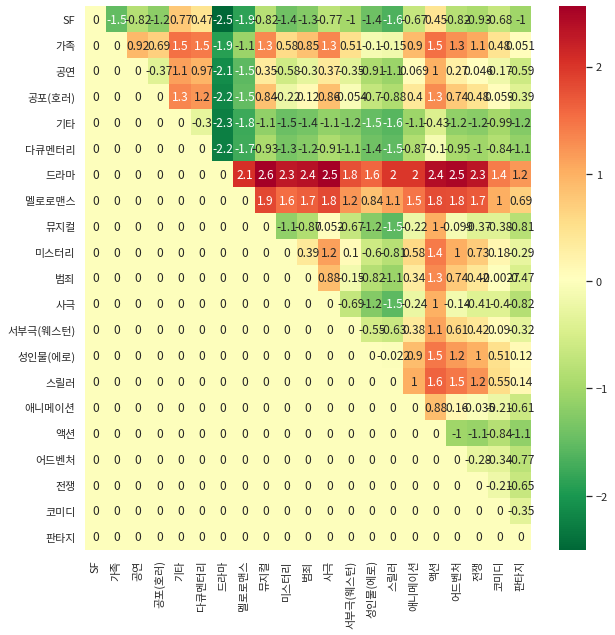

In [175]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt

np.random.seed(0)

# 한글 지원 폰트
plt.figure(figsize=(10,10))
sns.set(font="Noto Sans CJK JP")

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

드라마가 '시절'이라는 하나의 값만 존재하기 때문에 값이 붉게 나타남. 

확실히 액션이랑 멜로 로맨스가 큰값이 나타나는 것을 확인할수도 있음

## 소고

* 개념 혼동

처음에 s(w,A,B) 랑 weat_score를 구분이 잘 안되있어서 개념이 이해가 안됐음. 

편향으로 해석하는 방식도 참신했지만 건강식과 인스턴트를 구별해서 target과 attribute를 만들어서

의미를 잘 함축했냐를 분석한것이 색달랐음.

* tf-idf의 단점

너무 고유명사들이 많이 나온다고 느꼈습니다.


* 어떤 텍스트를 쓰느냐...

시놉시스 데이터를 쓰다보니 영화와 작품이 매우 유사한 단어로 꼽혔는데 
매우 주의해야할꺼같음.

영화를 좋아하는 사람의 글을 학습시키면 워드 임베딩에서 영화와 긍정적인 단어가 가까울것이고

영화를 싫어하는 사람의 글을 학습시키면 워드 임베딩에서 영화와 부정적인 단어가 가까울것임..

결국 text가 대중들의 마음, 사람들의 마음을 잘 나타낸 text를 학습시켜야

더 좋은 결과, 사람들이 공감할수있는 결과를 낼 수 있을 것 같다.

근데 그런건 과연 어떤 식으로 평가할수있을까?에 대한 의문이 떠오른다 설문조사? 주관적일수밖에 없을까..

* 코딩을 너무 못해.. 

함수화 시키려고 노력했는데 도저히 안되서 기초적인 부분만 함수화하고
노가다를 해서 데이터를 만들어버렸다...

* 중복없이 순서기준으로 짜르는 알고리즘..

이런 알고리즘을 잘모르다보니 그냥 set을 통해서 중복 제거하고 그대로 다시 list화하다보니

단어의 빈도수와 상관없이 단어를 가져와버리고 말았습니다. 알고리즘 공부의 필요성을 다시 느낍니다.

* 전반적으로 불만족..

weat_score는 결국 평균과 normalize를 통해서 검증을 하는것인데 

중복값제거하고 하다보니 너무 적은 단어만 만들어져서 제대로 계산이 되지못한거같아 불만이 큽니다..

# 루브릭

아래의 기준을 바탕으로 프로젝트를 평가합니다.


|평가문항|상세기준|
|:---|:---|
|1. 주어진 영화 코퍼스를 바탕으로 워드임베딩 모델을 정상적으로 만들었다.|워드임베딩의 most_similar() 메소드 결과가 의미상 바르게 나왔다.|
|2. 영화 구분, 장르별로 target, attribute에 대한 대표성있는 단어 셋을 생성하였다.|타당한 방법론을 통해 중복이 잘 제거되고 개념축을 의미적으로 잘 대표하는 단어 셋이 만들어졌다.|
|3. WEAT score 계산 및 시각화를 정상적으로 진행하였다.|전체 영화 장르별로 예술/일반 영화에 대한 편향성 WEAT score가 상식에 부합하는 수치로 얻어졌으며 이를 잘 시각화하였다.|